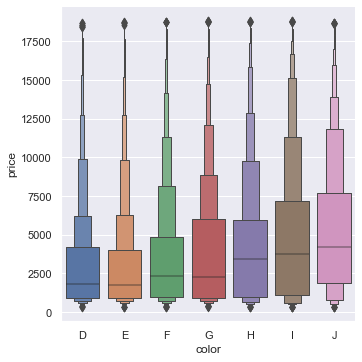

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
           data=diamonds.sort_values("color"))

plt.savefig("boxencolor.jpeg")

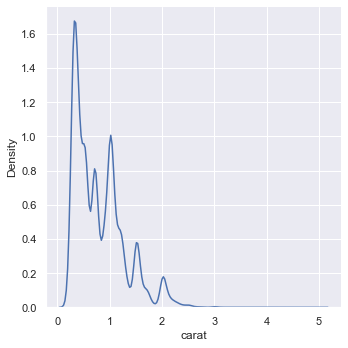

In [30]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

plt.savefig("kde1.jpeg")

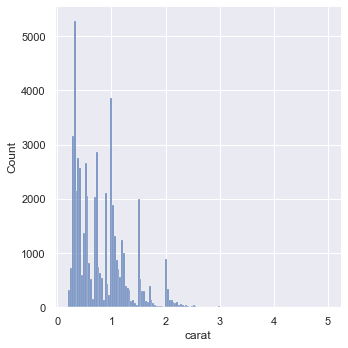

In [31]:
sns.displot(diamonds, x="carat")

plt.savefig("kde2.jpeg")

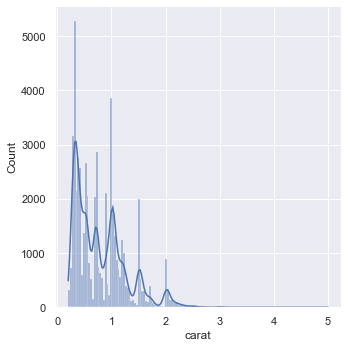

In [32]:
sns.displot(diamonds, x="carat", kde=True)
plt.savefig("kde3.jpeg")

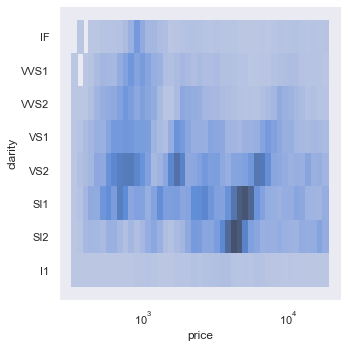

In [34]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

plt.savefig("heatmap.jpeg")

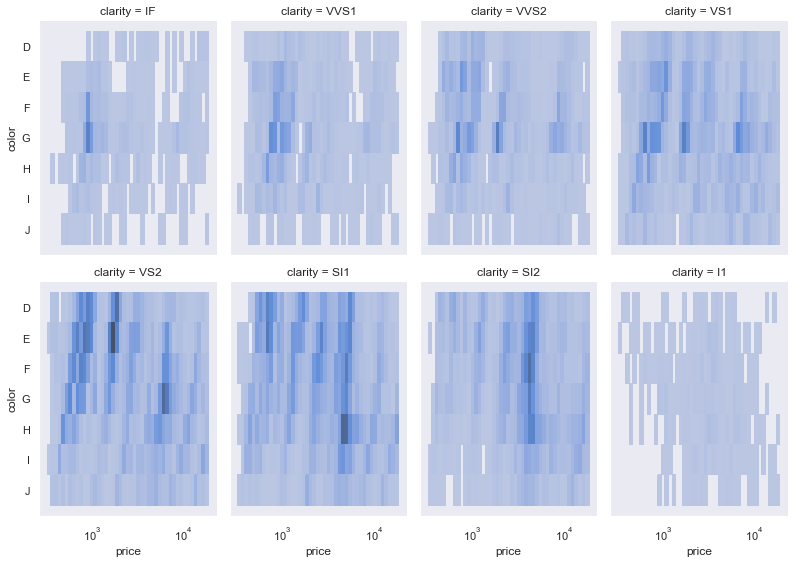

In [35]:
import seaborn as sns
sns.set_theme(style="dark")

diamonds = sns.load_dataset("diamonds")
sns.displot(
    data=diamonds, x="price", y="color", col="clarity",
    log_scale=(True, False), col_wrap=4, height=4, aspect=.7,
)


plt.savefig("colormulti.jpeg")

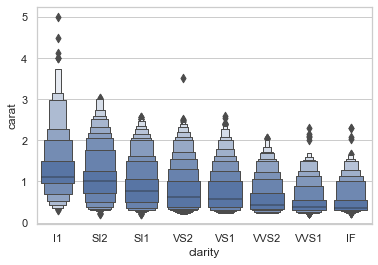

In [36]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.boxenplot(x="clarity", y="carat",
             color="b", order=clarity_ranking,
            scale="linear", data=diamonds)


plt.savefig("boxen.jpeg")

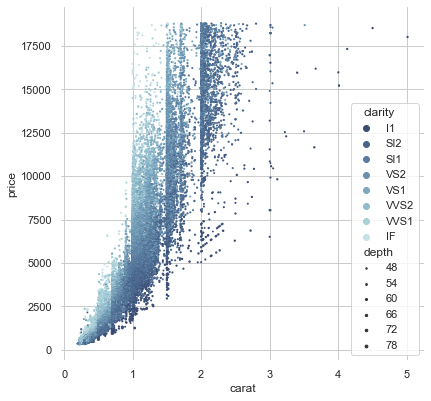

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

#load the example daimonds datset
diamonds = sns.load_dataset("diamonds")

#draw a scatter plot while assigning point colors and sizes to different
#variables in the dataset
f, ax = plt.subplots(figsize=(6.5,6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
               hue="clarity", size ="depth",
               palette="ch:r=-.2,d=.3_r",
               hue_order=clarity_ranking,
               sizes=(1,8), linewidth=0,
               data=diamonds, ax=ax)


plt.savefig("scatter.jpeg")

AttributeError: module 'matplotlib.ticker' has no attribute 'ScalerFormatter'

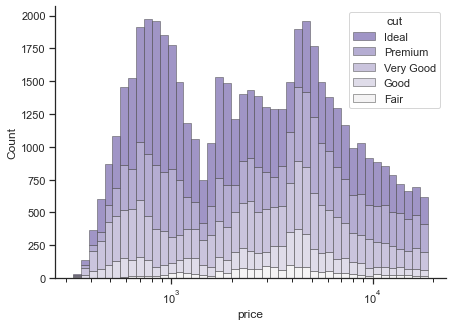

In [39]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7,5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.savefig("carat.jpeg")

ax.xaxis.set_major_formatter(mpl.ticker.ScalerFormatter())
ax.set_xticks([500,1000,2000,5000,10000])

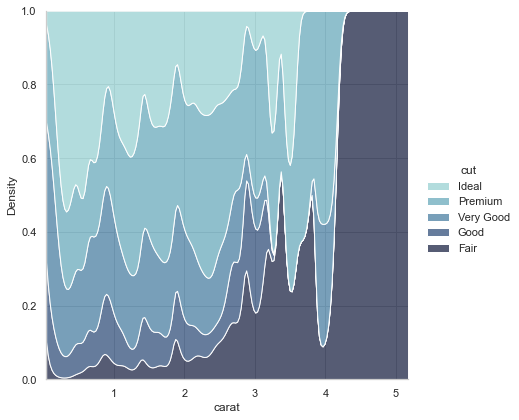

In [38]:
#multiple conditional kde
import seaborn as sns
sns.set_theme(style="whitegrid")

# load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

#plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25, hue=1, light=.75",
)


plt.savefig("multicondiational.jpeg")

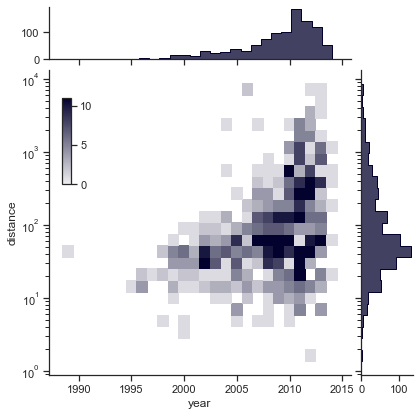

In [40]:
import seaborn as sns
sns.set_theme(style="ticks")

#joint and marginalhistorgram
#load the planets ddataset and intialize the figure
planets = sns.load_dataset("planets")
g= sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

#set a log scaling on the y axis
g.ax_joint.set(yscale="log")

#create an inset legend for the histogram colorbar
cax= g.fig.add_axes([.15, .55, .02, .2])

#add the joint and marginal historgram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap= "light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

plt.savefig("jointhist.jpeg")

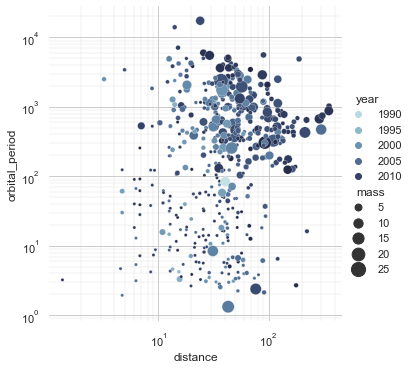

In [41]:
#scatterplot with continuous hues and sizes
import seaborn as sns
sns.set_theme(style="whitegrid")

#load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10,200),
    
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.savefig("planets.jpeg")

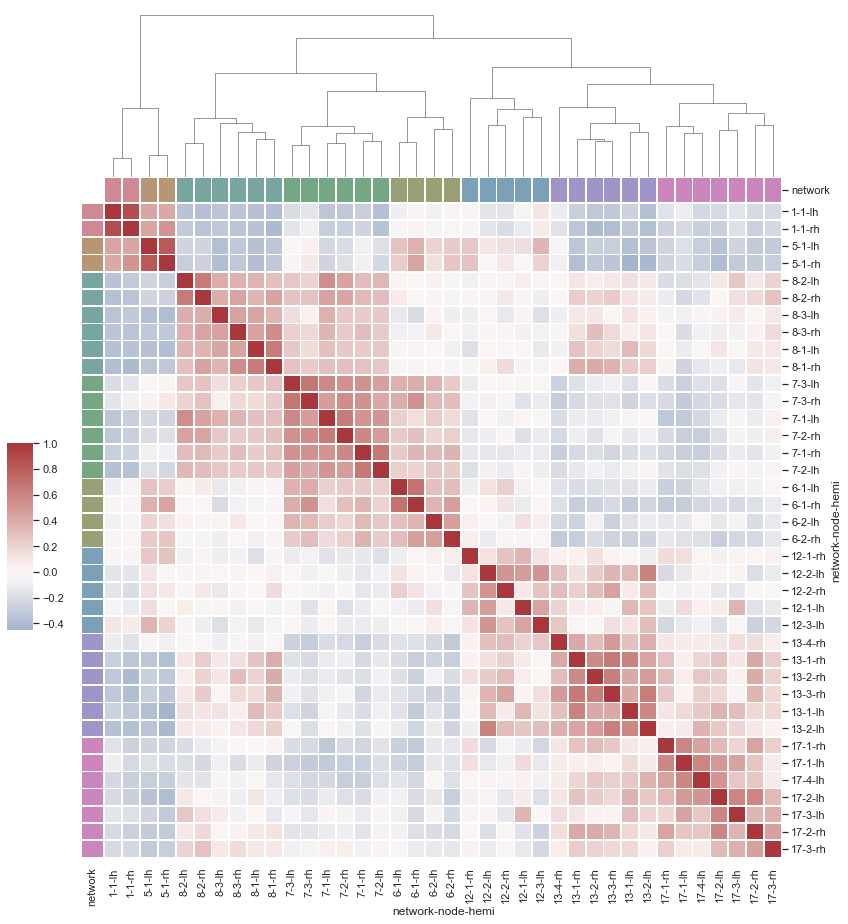

In [42]:
#structured heatmap
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

plt.savefig("heatmap.jpeg")